In [ ]:
本节内容：
将样本的三个变量（堵塞大小、测量误差、用户需求）进行控制变量分析。
选择堵塞大小作为不确定。

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
from torch.optim import Adam,AdamW
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import DataLoader
from prefetch_generator import BackgroundGenerator
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib
import matplotlib.pyplot as plt 
import hiddenlayer as hl
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer,RobustScaler,PowerTransformer,StandardScaler
from sklearn.metrics import accuracy_score
import lightgbm as lgb
#准备文件夹保存数据
local_path=os.getcwd()
if not os.path.exists(local_path+'\\blockagedata'):
    os.mkdir(local_path+'\\blockagedata')
print(local_path+'\\blockagedata')
#判断是否可以使用GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

E:\NBCode\block\blockagedata


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold,cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform,uniform,randint
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#准备文件夹保存数据
local_path=os.getcwd()
if not os.path.exists(local_path+'\\blockagedata'):
    os.mkdir(local_path+'\\blockagedata')
print(local_path+'\\blockagedata')

E:\NBCode\block\blockagedata


# ANN

In [3]:
class DataLoaderX(DataLoader):
    def __iter__(self):
        return BackgroundGenerator(super().__iter__())
#ANN
class ANN(nn.Module):
    def __init__(self,d1,hidden_size,d2):
        super(ANN,self).__init__()
        self.ann=nn.Sequential(nn.BatchNorm1d(d1,momentum=0.5),
                               nn.Linear(d1,hidden_size),
                               nn.LeakyReLU(),
                               nn.BatchNorm1d(hidden_size,momentum=0.5),
                               nn.Linear(hidden_size,d2),
                               nn.LeakyReLU()
                              )
    def forward(self,x):
        x = self.ann(x)
        return x
#训练模型
def anntrain(args):
    model=ANN(d1=args['d1'],hidden_size=args['hidden_size'],d2=args['d2']).to(device)
    criterion=nn.CrossEntropyLoss().to(device)
    optimizer=AdamW(model.parameters(),lr=args['learning_rate'],weight_decay=args['weight_decay'])
    scheduler=LambdaLR(optimizer,verbose=False,lr_lambda=lambda epoch:1/(epoch/100+1))
    train_loader=DataLoader(dataset=train_data,batch_size=len(x_train),
                                  shuffle=True,num_workers=0)
    history1=hl.History()
    canvas1=hl.Canvas()
    best_acc=0
    for epoch in tqdm(range(args['epoches'])):
        for step,(batch_x,batch_y) in enumerate(train_loader):
            #输出层与标签之间的误差    
            model.train()
            prediction=model(batch_x)
            loss=criterion(prediction,batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #记录误差曲线和acc曲线
            steps=epoch*len(train_loader)+step+1
            if steps%25==0:
                test_acc=score_model(x_test_tensor,y_test_tensor,model)
                best_acc=test_acc if test_acc>best_acc else best_acc
                history1.log(steps,train_loss=loss.item(),test_accuracy=test_acc)
        scheduler.step()
    with canvas1:
        canvas1.draw_plot(history1['train_loss'])
        canvas1.draw_plot(history1['test_accuracy'])
    print('train_loss:%.4f'%loss.item())
    print('test_acc:%.4f'%test_acc)
    print('best_acc:%.4f'%best_acc)
    return model,best_acc
#测试数据
def run_model(data,model):
    model.eval()
    torch.no_grad()
    prediction=model(data)
    return prediction.detach()
def score_model(x_tensor,label_tensor,model):
    x=run_model(x_tensor,model)
    x=torch.argmax(x,1).unsqueeze(1)
    score=(x==label_tensor).sum().item()/len(x)
    return score

## 得到模型

In [4]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blockagedata\\Sample_116.csv',header=0)
#划分样本和标签
t0=sample.iloc[np.where(sample.loc[:,'time']==0)[0],:]
t1=sample.iloc[np.where(sample.loc[:,'time']==1)[0],:]
t2=sample.iloc[np.where(sample.loc[:,'time']==2)[0],:]
t3=sample.iloc[np.where(sample.loc[:,'time']==3)[0],:]
t4=sample.iloc[np.where(sample.loc[:,'time']==4)[0],:]
t5=sample.iloc[np.where(sample.loc[:,'time']==5)[0],:]
t6=sample.iloc[np.where(sample.loc[:,'time']==6)[0],:]
t7=sample.iloc[np.where(sample.loc[:,'time']==7)[0],:]
t8=sample.iloc[np.where(sample.loc[:,'time']==8)[0],:]
t9=sample.iloc[np.where(sample.loc[:,'time']==9)[0],:]
t10=sample.iloc[np.where(sample.loc[:,'time']==10)[0],:]
t11=sample.iloc[np.where(sample.loc[:,'time']==11)[0],:]
t12=sample.iloc[np.where(sample.loc[:,'time']==12)[0],:]
t13=sample.iloc[np.where(sample.loc[:,'time']==13)[0],:]
t14=sample.iloc[np.where(sample.loc[:,'time']==14)[0],:]
t15=sample.iloc[np.where(sample.loc[:,'time']==15)[0],:]
t16=sample.iloc[np.where(sample.loc[:,'time']==16)[0],:]
t17=sample.iloc[np.where(sample.loc[:,'time']==17)[0],:]
t18=sample.iloc[np.where(sample.loc[:,'time']==18)[0],:]
t19=sample.iloc[np.where(sample.loc[:,'time']==19)[0],:]
t20=sample.iloc[np.where(sample.loc[:,'time']==20)[0],:]
t21=sample.iloc[np.where(sample.loc[:,'time']==21)[0],:]
t22=sample.iloc[np.where(sample.loc[:,'time']==22)[0],:]
t23=sample.iloc[np.where(sample.loc[:,'time']==23)[0],:]

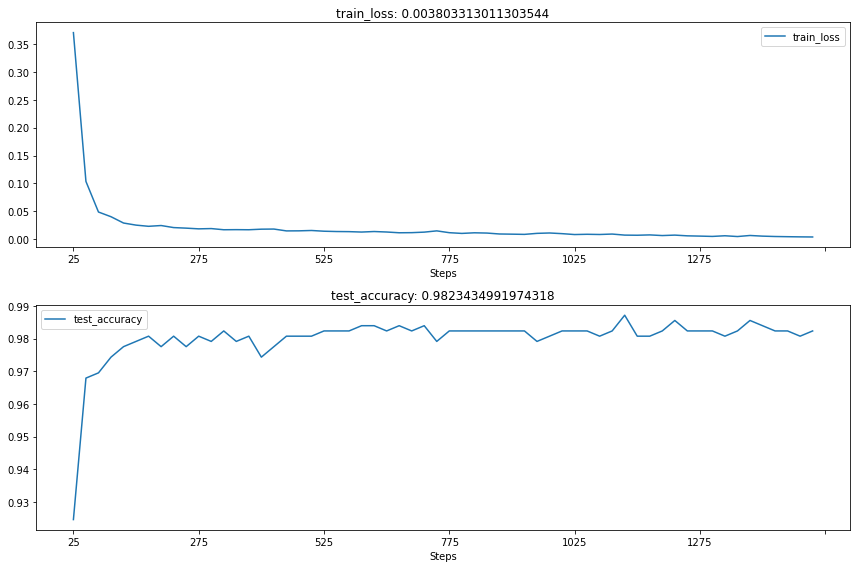

train_loss:0.0038
test_acc:0.9823
best_acc:0.9872
train_acc: 0.9987946966653274
acc: [0.9871589085072231]
ave_acc 0.9871589085072231
score_record: [0.9871589085072231]
hs_record: [110]


In [10]:
t=pd.concat([t6,t12,t17],axis=0)
x=np.array(t.iloc[:,range(0,96)])#.astype(int)
y=np.array(t.loc[:,'code']).reshape(-1,1).astype(int)
#训练模型
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
score_record=[]
hs_record=[]
for hs in range(110,120,10):
    params={
    "d1":96,
    "hidden_size": hs,
    "d2":116,
    "learning_rate":0.01,
    "epoches":1500,
    "weight_decay":0.01
    }
    acc=[]
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #qt
        qt = QuantileTransformer(output_distribution = 'uniform' )
#         qt = PowerTransformer()
#         qt = RobustScaler()
#         qt = StandardScaler()
        x_train = qt.fit_transform(x_train)
        x_test = qt.transform(x_test)
        #numpy转为张量
        x_train_tensor=torch.from_numpy(x_train).float().to(device)
        y_train_tensor=torch.from_numpy(y_train).to(device)
        x_test_tensor=torch.from_numpy(x_test).float().to(device)
        y_test_tensor=torch.from_numpy(y_test).to(device)
        train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
        annmodel,best_acc=anntrain(params)
        train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
        print('train_acc:',train_acc)
        acc.append(best_acc)
        print('acc:',acc)
        break
    ave_score=np.mean(acc)
    print('ave_acc',ave_score)
    score_record.append(ave_score)
    hs_record.append(hs)
    print('score_record:',score_record)
    print('hs_record:',hs_record)

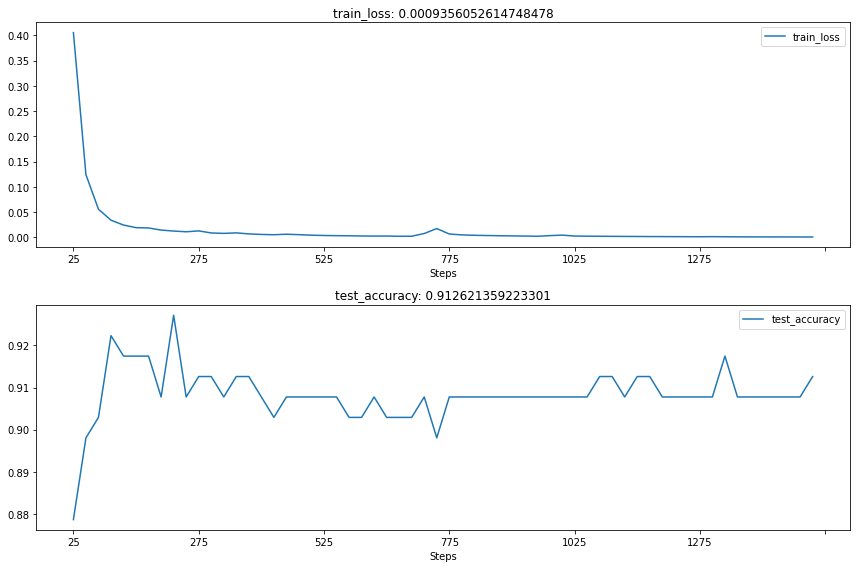

train_loss:0.0009
test_acc:0.9126
best_acc:0.9272
train_acc: 1.0
acc: [0.9516908212560387, 0.8985507246376812, 0.9271844660194175, 0.941747572815534, 0.9271844660194175]
ave_acc 0.9292716101496177
score_record: [0.9292716101496177]
hs_record: [110]


In [26]:
t_score=[]
for t,i in zip([t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23],range(24)):
    #划分样本和标签
    x=np.array(t.iloc[:,range(0,96)])#.astype(int)
    y=np.array(t.loc[:,'code']).reshape(-1,1).astype(int)
    #训练模型
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    score_record=[]
    hs_record=[]
    for hs in range(110,120,10):
        params={
        "d1":96,
        "hidden_size": hs,
        "d2":116,
        "learning_rate":0.01,
        "epoches":1500,
        "weight_decay":0.01
        }
        acc=[]
        for train_index, test_index in skf.split(x,y):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            #qt
            qt = QuantileTransformer(output_distribution = 'uniform' )
    #         qt = PowerTransformer()
    #         qt = RobustScaler()
    #         qt = StandardScaler()
            x_train = qt.fit_transform(x_train)
            x_test = qt.transform(x_test)
            #numpy转为张量
            x_train_tensor=torch.from_numpy(x_train).float().to(device)
            y_train_tensor=torch.from_numpy(y_train).to(device)
            x_test_tensor=torch.from_numpy(x_test).float().to(device)
            y_test_tensor=torch.from_numpy(y_test).to(device)
            train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
            annmodel,best_acc=anntrain(params)
            train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
            print('train_acc:',train_acc)
            acc.append(best_acc)
            print('acc:',acc)
        ave_score=np.mean(acc)
        print('ave_acc',ave_score)
        score_record.append(ave_score)
        hs_record.append(hs)
        print('score_record:',score_record)
        print('hs_record:',hs_record)
    t_score.append([i,ave_score])
    print(i)

In [28]:
t_score

[0.9282163125556963,
 0.9477041414567797,
 0.9536742846525454,
 0.9506214530275316,
 0.9651423479198911,
 0.9447493081937995,
 0.9585377183203269,
 0.9536231884057973,
 0.9662114455592716,
 0.9653056484578224,
 0.9652777777777777,
 0.9662114455592716,
 0.9662857673727239,
 0.9535340743867549,
 0.961352657004831,
 0.9458937198067634,
 0.9545893719806763,
 0.96626254180602,
 0.9468599033816425,
 0.9594435154217763,
 0.9546358231140839,
 0.9536696395392047,
 0.9555555555555555,
 0.9292716101496177]

## 处理结果

In [13]:
torch.save(annmodel.state_dict(),local_path+'\\models\\ann_hid110_diameter.pkl')
# model = TheModelClass(...)
# model.load_state_dict(torch.load('\parameter.pkl'))

In [49]:
# model = TheModelClass(...)
# model.load_state_dict(torch.load('\parameter.pkl'))
pre=run_model(x_test_tensor,annmodel)
pre=torch.argmax(pre,1).unsqueeze(1).cpu().numpy()
bool1=np.ones([len(pre),1])
bool1[np.where(pre.ravel()!=y_test.ravel())]=0
pred=pd.DataFrame(pre)
S=t.loc[t.index[test_index],:]
para=S.iloc[:,range(96,99)].reset_index()
bool2=pd.DataFrame(bool1.astype(int))
a=pd.concat([pred,para,bool2],axis=1,ignore_index=True)
a.columns=['pred','index','true','dn','time','bool']
a=a[['index','pred','true','dn','time','bool']]
a.to_csv(local_path+'\\blockagedata\\ann_hid110_diameter_test_result.csv',encoding='ascii',index=True)
a=np.array(a)
abc=pd.DataFrame([])
for i in range(1,10):
    b=a[np.where(a[:,3]==i)]
    whole_number=len(b)
    true_number=np.sum(b[:,-1])
    false_number=whole_number-true_number
    abc.loc[i,0]=whole_number
    abc.loc[i,1]=true_number
    abc.loc[i,2]=false_number
    abc.loc[i,3]=true_number/whole_number
abc.columns=['whole','true','false','accuracy']
a=np.array(a)
abc=pd.DataFrame([])
for i in range(1,10):
    b=a[np.where(a[:,3]==i)]
    whole_number=len(b)
    true_number=np.sum(b[:,-1])
    false_number=whole_number-true_number
    abc.loc[i,0]=whole_number
    abc.loc[i,1]=true_number
    abc.loc[i,2]=false_number
    abc.loc[i,3]=true_number/whole_number
abc.columns=['whole','true','false','accuracy']
abc.to_csv(local_path+'\\blockagedata\\ann_hid110_diameter_test_result_post.csv',encoding='ascii',index=True)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test.ravel(),pre))
cm.to_csv(local_path+'\\blockagedata\\ann_hid110_cm.csv',encoding='ascii',index=True)

# SVM

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
qt=QuantileTransformer(output_distribution = 'uniform')
x_train=X_train[:,range(0,96)]
x_test=X_test[:,range(0,96)]
x_train=qt.fit_transform(x_train)
x_test=qt.transform(x_test)
clf=SVC(decision_function_shape='ovr',kernel='rbf',C=500000,gamma=0.06)
clf.fit(x_train,y_train.ravel())
score=clf.score(x_test,y_test.ravel())

In [40]:
t=pd.concat([t6,t12,t17],axis=0)
#划分样本和标签
x=np.array(t.iloc[:,range(0,96)])#.astype(int)
y=np.array(t.loc[:,'code']).reshape(-1,1).astype(int)
#训练模型
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
acc=[]
for train_index, test_index in skf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #qt
    qt = QuantileTransformer(output_distribution = 'uniform' )
#         qt = PowerTransformer()
#         qt = RobustScaler()
#         qt = StandardScaler()
    x_train = qt.fit_transform(x_train)
    x_test = qt.transform(x_test)

    clf=SVC(decision_function_shape='ovr',kernel='rbf',C=500000,gamma=0.06)
    clf.fit(x_train,y_train.ravel())
    best_acc=clf.score(x_test,y_test.ravel())
    train_acc=clf.score(x_train,y_train.ravel())
    print('train_acc:',train_acc)
    acc.append(best_acc)
    print('acc:',acc)
    break
ave_score=np.mean(acc)
print('ave_acc',ave_score)

train_acc: 1.0
acc: [0.9791332263242376]
ave_acc 0.9791332263242376


In [50]:
import joblib
joblib.dump(clf, local_path+'\\models\\svm_diameter.pkl') 
# clf = joblib.load(local_path+'\\models\\svm_diameter.pkl') 
pre=clf.predict(x_test_tensor)
bool1=np.ones([len(pre),1])
bool1[np.where(pre.ravel()!=y_test.ravel())]=0
pred=pd.DataFrame(pre)
S=t.loc[t.index[test_index],:]
para=S.iloc[:,range(96,99)].reset_index()
bool2=pd.DataFrame(bool1.astype(int))
a=pd.concat([pred,para,bool2],axis=1,ignore_index=True)
a.columns=['pred','index','true','dn','time','bool']
a=a[['index','pred','true','dn','time','bool']]
a.to_csv(local_path+'\\blockagedata\\svm_diameter_test_result.csv',encoding='ascii',index=True)
a=np.array(a)
abc=pd.DataFrame([])
for i in range(1,10):
    b=a[np.where(a[:,3]==i)]
    whole_number=len(b)
    true_number=np.sum(b[:,-1])
    false_number=whole_number-true_number
    abc.loc[i,0]=whole_number
    abc.loc[i,1]=true_number
    abc.loc[i,2]=false_number
    abc.loc[i,3]=true_number/whole_number
abc.columns=['whole','true','false','accuracy']
abc.to_csv(local_path+'\\blockagedata\\svm_diameter_test_result_post.csv',encoding='ascii',index=True)

In [40]:
t_score=[]
for t in [t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23]:
    #划分样本和标签
    x=np.array(t.iloc[:,range(0,96)])#.astype(int)
    y=np.array(t.loc[:,'code']).reshape(-1,1).astype(int)
    #训练模型
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    acc=[]
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #qt
        qt = QuantileTransformer(output_distribution = 'uniform' )
#         qt = PowerTransformer()
#         qt = RobustScaler()
#         qt = StandardScaler()
        x_train = qt.fit_transform(x_train)
        x_test = qt.transform(x_test)

        clf=SVC(decision_function_shape='ovr',kernel='rbf',C=500000,gamma=0.06)
        clf.fit(x_train,y_train.ravel())
        best_acc=clf.score(x_test,y_test.ravel())
        train_acc=clf.score(x_train,y_train.ravel())
        print('train_acc:',train_acc)
        acc.append(best_acc)
        print('acc:',acc)
    ave_score=np.mean(acc)
    print('ave_acc',ave_score)
    t_score.append(ave_score)

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (824). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8840579710144928]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8840579710144928, 0.9077669902912622]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8840579710144928, 0.9077669902912622, 0.8883495145631068]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8840579710144928, 0.9077669902912622, 0.8883495145631068, 0.8932038834951457]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8840579710144928, 0.9077669902912622, 0.8883495145631068, 0.8932038834951457, 0.8689320388349514]
ave_acc 0.8884620796397918


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812, 0.893719806763285]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812, 0.893719806763285, 0.9033816425120773]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812, 0.893719806763285, 0.9033816425120773, 0.8883495145631068]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812, 0.893719806763285, 0.9033816425120773, 0.8883495145631068, 0.883495145631068]
ave_acc 0.8934993668214437


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9038461538461539]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9038461538461539, 0.9178743961352657]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9038461538461539, 0.9178743961352657, 0.9227053140096618]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9038461538461539, 0.9178743961352657, 0.9227053140096618, 0.8888888888888888]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9038461538461539, 0.9178743961352657, 0.9227053140096618, 0.8888888888888888, 0.9227053140096618]
ave_acc 0.9112040133779263


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9178743961352657]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9178743961352657, 0.9323671497584541]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9178743961352657, 0.9323671497584541, 0.927536231884058]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9178743961352657, 0.9323671497584541, 0.927536231884058, 0.9223300970873787]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9178743961352657, 0.9323671497584541, 0.927536231884058, 0.9223300970873787, 0.941747572815534]
ave_acc 0.9283710895361381


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.9516908212560387]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.9516908212560387, 0.9178743961352657]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.9516908212560387, 0.9178743961352657, 0.941747572815534]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.9516908212560387, 0.9178743961352657, 0.941747572815534, 0.9368932038834952]
ave_acc 0.9351484451948784


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.8985507246376812]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.8985507246376812, 0.8980582524271845]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.8985507246376812, 0.8980582524271845, 0.8883495145631068]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.8985507246376812, 0.8980582524271845, 0.8883495145631068, 0.9271844660194175]
ave_acc 0.9079358379062896


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9278846153846154]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9278846153846154, 0.9086538461538461]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9278846153846154, 0.9086538461538461, 0.9371980676328503]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9278846153846154, 0.9086538461538461, 0.9371980676328503, 0.9468599033816425]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9278846153846154, 0.9086538461538461, 0.9371980676328503, 0.9468599033816425, 0.9227053140096618]
ave_acc 0.9286603493125233


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.9468599033816425]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.9468599033816425, 0.9371980676328503]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.9468599033816425, 0.9371980676328503, 0.9033816425120773]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.927536231884058, 0.9468599033816425, 0.9371980676328503, 0.9033816425120773, 0.9420289855072463]
ave_acc 0.9314009661835749


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9420289855072463]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9420289855072463, 0.9468599033816425]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9420289855072463, 0.9468599033816425, 0.9468599033816425]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9420289855072463, 0.9468599033816425, 0.9468599033816425, 0.927536231884058]
ave_acc 0.9411185432924561


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9519230769230769]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9519230769230769, 0.9471153846153846]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9519230769230769, 0.9471153846153846, 0.9420289855072463]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9519230769230769, 0.9471153846153846, 0.9420289855072463, 0.9468599033816425]
ave_acc 0.9460470085470085


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9471153846153846]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9471153846153846, 0.9567307692307693]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9471153846153846, 0.9567307692307693, 0.961352657004831]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9471153846153846, 0.9567307692307693, 0.961352657004831, 0.9516908212560387]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9471153846153846, 0.9567307692307693, 0.961352657004831, 0.9516908212560387, 0.9130434782608695]
ave_acc 0.9459866220735785


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9519230769230769]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9519230769230769, 0.9516908212560387]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9519230769230769, 0.9516908212560387, 0.9227053140096618]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9519230769230769, 0.9516908212560387, 0.9227053140096618, 0.961352657004831]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9519230769230769, 0.9516908212560387, 0.9227053140096618, 0.961352657004831, 0.927536231884058]
ave_acc 0.9430416202155332


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9615384615384616]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9615384615384616, 0.9471153846153846]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9615384615384616, 0.9471153846153846, 0.9423076923076923]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9615384615384616, 0.9471153846153846, 0.9423076923076923, 0.9468599033816425]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9615384615384616, 0.9471153846153846, 0.9423076923076923, 0.9468599033816425, 0.9565217391304348]
ave_acc 0.9508686361947231


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9082125603864735]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9082125603864735, 0.9227053140096618]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9082125603864735, 0.9227053140096618, 0.9420289855072463]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9082125603864735, 0.9227053140096618, 0.9420289855072463, 0.9174757281553398]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9082125603864735, 0.9227053140096618, 0.9420289855072463, 0.9174757281553398, 0.912621359223301]
ave_acc 0.9206087894564046


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9420289855072463]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9420289855072463, 0.9468599033816425]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9420289855072463, 0.9468599033816425, 0.9130434782608695]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9420289855072463, 0.9468599033816425, 0.9130434782608695, 0.8985507246376812]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9420289855072463, 0.9468599033816425, 0.9130434782608695, 0.8985507246376812, 0.9227053140096618]
ave_acc 0.9246376811594204


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9227053140096618]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9227053140096618, 0.893719806763285]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9227053140096618, 0.893719806763285, 0.9033816425120773]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9227053140096618, 0.893719806763285, 0.9033816425120773, 0.9227053140096618]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9227053140096618, 0.893719806763285, 0.9033816425120773, 0.9227053140096618, 0.9323671497584541]
ave_acc 0.914975845410628


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812, 0.9082125603864735]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812, 0.9082125603864735, 0.9082125603864735]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812, 0.9082125603864735, 0.9082125603864735, 0.9371980676328503]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8985507246376812, 0.9082125603864735, 0.9082125603864735, 0.9371980676328503, 0.9178743961352657]
ave_acc 0.9140096618357487


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9038461538461539]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9038461538461539, 0.9323671497584541]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9038461538461539, 0.9323671497584541, 0.9468599033816425]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9423076923076923, 0.9038461538461539, 0.9323671497584541, 0.9468599033816425, 0.9516908212560387]
ave_acc 0.9354143441099962


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9371980676328503]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9371980676328503, 0.9033816425120773]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9371980676328503, 0.9033816425120773, 0.927536231884058]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9371980676328503, 0.9033816425120773, 0.927536231884058, 0.9420289855072463]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9371980676328503, 0.9033816425120773, 0.927536231884058, 0.9420289855072463, 0.927536231884058]
ave_acc 0.927536231884058


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375, 0.966183574879227]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375, 0.966183574879227, 0.8985507246376812]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375, 0.966183574879227, 0.8985507246376812, 0.9468599033816425]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375, 0.966183574879227, 0.8985507246376812, 0.9468599033816425, 0.9468599033816425]
ave_acc 0.9391908212560386


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9326923076923077]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9326923076923077, 0.961352657004831]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9326923076923077, 0.961352657004831, 0.9130434782608695]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9326923076923077, 0.961352657004831, 0.9130434782608695, 0.9420289855072463]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9326923076923077, 0.961352657004831, 0.9130434782608695, 0.9420289855072463, 0.9227053140096618]
ave_acc 0.9343645484949832


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375, 0.927536231884058]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375, 0.927536231884058, 0.9371980676328503]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375, 0.927536231884058, 0.9371980676328503, 0.9516908212560387]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9375, 0.927536231884058, 0.9371980676328503, 0.9516908212560387, 0.9082125603864735]
ave_acc 0.932427536231884


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9130434782608695]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9130434782608695, 0.9082125603864735]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9130434782608695, 0.9082125603864735, 0.9227053140096618]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9130434782608695, 0.9082125603864735, 0.9227053140096618, 0.9371980676328503]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.9130434782608695, 0.9082125603864735, 0.9227053140096618, 0.9371980676328503, 0.9371980676328503]
ave_acc 0.923671497584541


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8743961352657005]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8743961352657005, 0.8405797101449275]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8743961352657005, 0.8405797101449275, 0.8592233009708737]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8743961352657005, 0.8405797101449275, 0.8592233009708737, 0.8737864077669902]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8743961352657005, 0.8405797101449275, 0.8592233009708737, 0.8737864077669902, 0.883495145631068]
ave_acc 0.8662961399559119


In [39]:
t_score

[0.8826415271328736,
 0.8915669996716853,
 0.9121748420661465,
 0.9235261010271563,
 0.9312696402607757,
 0.9011444116129639,
 0.9277034559643255,
 0.9285024154589372,
 0.9382199925678186,
 0.9412393162393162,
 0.9382850241545893,
 0.9362876254180602,
 0.9412300260126347,
 0.9186717320951174,
 0.9227053140096618,
 0.9111111111111111,
 0.9159420289855073,
 0.9325111482720179,
 0.9169082125603865,
 0.9382246376811594,
 0.9353353771832031,
 0.9324182460052025,
 0.9246376811594204,
 0.8595000234510577]

In [ ]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample_116.csv',header=0)
#划分样本和标签
x=np.array(sample.iloc[:,range(0,96)])#.astype(int)
y=np.array(sample.loc[:,'code']).reshape(-1,1).astype(int)

In [ ]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('svc', SVC(decision_function_shape='ovr',kernel='rbf'))])
param_dist = {'svc__C': [1,10,100,1000,10000,100000,500000,800000,1000000,1200000,1500000],
 'svc__gamma': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.01]}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = GridSearchCV(estimator=pipe,param_grid=param_dist,cv=splitter,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

In [ ]:
print('网格搜索-度量记录：',search.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search.best_estimator_)  # 获取最佳度量时的分类器模型

In [ ]:
xx=search.cv_results_['param_svc__C'].data.astype(float)
yy=search.cv_results_['param_svc__gamma'].data.astype(float)
zz=search.cv_results_['mean_test_score'].astype(float)
xx=np.expand_dims(xx,axis=1)
yy=np.expand_dims(yy,axis=1)
zz=np.expand_dims(zz,axis=1)
print(xx.shape)
print(yy.shape)
print(zz.shape)
zxc=pd.DataFrame(np.hstack((xx,yy,zz)))
zxc.columns=['C','gamma','acc']
zxc=pd.pivot_table(zxc,index=['C'],columns=['gamma'],values=['acc'])
zxc.to_csv(local_path+'\\blockagedata\\svm_finetune_grid_b.csv',encoding='ascii',index=True)

In [ ]:
zxc=pd.DataFrame(np.hstack((xx,yy,zz)))
zxc.columns=['C','gamma','acc']
a=pd.pivot_table(zxc,index=['C'],columns=['gamma'],values=['acc'])
a.to_csv(local_path+'\\blockagedata\\svm_finetune_grid_a.csv',encoding='ascii',index=False)

# RF

In [51]:
t=pd.concat([t6,t12,t17],axis=0)
#划分样本和标签
x=np.array(t.iloc[:,range(0,96)])#.astype(int)
y=np.array(t.loc[:,'code']).reshape(-1,1).astype(int)
#训练模型
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
acc=[]
for train_index, test_index in skf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #qt
    qt = QuantileTransformer(output_distribution = 'uniform' )
#         qt = PowerTransformer()
#         qt = RobustScaler()
#         qt = StandardScaler()
    x_train = qt.fit_transform(x_train)
    x_test = qt.transform(x_test)

    clf= RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,n_jobs=-1)
    clf.fit(x_train,y_train.ravel())
    best_acc=clf.score(x_test,y_test.ravel())
    train_acc=clf.score(x_train,y_train.ravel())
    print('train_acc:',train_acc)
    acc.append(best_acc)
    print('acc:',acc)
    break
ave_score=np.mean(acc)
print('ave_acc',ave_score)

train_acc: 1.0
acc: [0.9630818619582665]
ave_acc 0.9630818619582665


In [52]:
import joblib
joblib.dump(clf, local_path+'\\models\\rf_diameter.pkl') 
# clf = joblib.load(local_path+'\\models\\svm_diameter.pkl') 
pre=clf.predict(x_test_tensor)
bool1=np.ones([len(pre),1])
bool1[np.where(pre.ravel()!=y_test.ravel())]=0
pred=pd.DataFrame(pre)
S=t.loc[t.index[test_index],:]
para=S.iloc[:,range(96,99)].reset_index()
bool2=pd.DataFrame(bool1.astype(int))
a=pd.concat([pred,para,bool2],axis=1,ignore_index=True)
a.columns=['pred','index','true','dn','time','bool']
a=a[['index','pred','true','dn','time','bool']]
a.to_csv(local_path+'\\blockagedata\\rf_diameter_test_result.csv',encoding='ascii',index=True)
a=np.array(a)
abc=pd.DataFrame([])
for i in range(1,10):
    b=a[np.where(a[:,3]==i)]
    whole_number=len(b)
    true_number=np.sum(b[:,-1])
    false_number=whole_number-true_number
    abc.loc[i,0]=whole_number
    abc.loc[i,1]=true_number
    abc.loc[i,2]=false_number
    abc.loc[i,3]=true_number/whole_number
abc.columns=['whole','true','false','accuracy']
abc.to_csv(local_path+'\\blockagedata\\rf_diameter_test_result_post.csv',encoding='ascii',index=True)

In [49]:
t_score=[]
for t,i in zip([t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23],range(24)):
    #划分样本和标签
    x=np.array(t.iloc[:,range(0,96)])#.astype(int)
    y=np.array(t.loc[:,'code']).reshape(-1,1).astype(int)
    #训练模型
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    acc=[]
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #qt
        qt = QuantileTransformer(output_distribution = 'uniform' )
#         qt = PowerTransformer()
#         qt = RobustScaler()
#         qt = StandardScaler()
        x_train = qt.fit_transform(x_train)
        x_test = qt.transform(x_test)

        clf= RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,n_jobs=-1)
        clf.fit(x_train,y_train.ravel())
        best_acc=clf.score(x_test,y_test.ravel())
        train_acc=clf.score(x_train,y_train.ravel())
        print('train_acc:',train_acc)
        acc.append(best_acc)
        print('acc:',acc)
    ave_score=np.mean(acc)
    print('ave_acc',ave_score)
    t_score.append(ave_score)
    print(i)

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (824). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6183574879227053]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6183574879227053, 0.6796116504854369]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6183574879227053, 0.6796116504854369, 0.7281553398058253]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6183574879227053, 0.6796116504854369, 0.7281553398058253, 0.7038834951456311]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6183574879227053, 0.6796116504854369, 0.7281553398058253, 0.7038834951456311, 0.6553398058252428]
ave_acc 0.6770695558369682
0


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.6714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.6714975845410628, 0.748792270531401]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.6714975845410628, 0.748792270531401, 0.6941747572815534]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.6714975845410628, 0.748792270531401, 0.6941747572815534, 0.6699029126213593]
ave_acc 0.6892406547535295
1


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693, 0.6956521739130435]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693, 0.6956521739130435, 0.714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693, 0.6956521739130435, 0.714975845410628, 0.7198067632850241]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693, 0.6956521739130435, 0.714975845410628, 0.7198067632850241, 0.6618357487922706]
ave_acc 0.6998002601263471
2


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6666666666666666]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6666666666666666, 0.7053140096618358]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6666666666666666, 0.7053140096618358, 0.6811594202898551]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6666666666666666, 0.7053140096618358, 0.6811594202898551, 0.7038834951456311]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6666666666666666, 0.7053140096618358, 0.6811594202898551, 0.7038834951456311, 0.7038834951456311]
ave_acc 0.6921814173819238
3


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396, 0.7198067632850241]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396, 0.7198067632850241, 0.7342995169082126]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396, 0.7198067632850241, 0.7342995169082126, 0.6941747572815534]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396, 0.7198067632850241, 0.7342995169082126, 0.6941747572815534, 0.7281553398058253]
ave_acc 0.715383893813611
4


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396, 0.6714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396, 0.6714975845410628, 0.7135922330097088]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396, 0.6714975845410628, 0.7135922330097088, 0.6747572815533981]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7004830917874396, 0.6714975845410628, 0.7135922330097088, 0.6747572815533981, 0.7524271844660194]
ave_acc 0.7025514750715256
5


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7548076923076923]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7548076923076923, 0.6442307692307693]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7548076923076923, 0.6442307692307693, 0.714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7548076923076923, 0.6442307692307693, 0.714975845410628, 0.7053140096618358]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7548076923076923, 0.6442307692307693, 0.714975845410628, 0.7053140096618358, 0.7004830917874396]
ave_acc 0.703962281679673
6


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7053140096618358]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7053140096618358, 0.7004830917874396]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7053140096618358, 0.7004830917874396, 0.7729468599033816]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7053140096618358, 0.7004830917874396, 0.7729468599033816, 0.748792270531401]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7053140096618358, 0.7004830917874396, 0.7729468599033816, 0.748792270531401, 0.7294685990338164]
ave_acc 0.7314009661835749
7


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7355769230769231]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7355769230769231, 0.7439613526570048]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7355769230769231, 0.7439613526570048, 0.7584541062801933]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7355769230769231, 0.7439613526570048, 0.7584541062801933, 0.7101449275362319]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7355769230769231, 0.7439613526570048, 0.7584541062801933, 0.7101449275362319, 0.6811594202898551]
ave_acc 0.7258593459680416
8


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846, 0.7019230769230769]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846, 0.7019230769230769, 0.7596153846153846]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846, 0.7019230769230769, 0.7596153846153846, 0.7342995169082126]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846, 0.7019230769230769, 0.7596153846153846, 0.7342995169082126, 0.7053140096618358]
ave_acc 0.7196534745447789
9


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384, 0.7067307692307693]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384, 0.7067307692307693, 0.7874396135265701]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384, 0.7067307692307693, 0.7874396135265701, 0.748792270531401]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384, 0.7067307692307693, 0.7874396135265701, 0.748792270531401, 0.7004830917874396]
ave_acc 0.7338814567075438
10


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6826923076923077]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6826923076923077, 0.7391304347826086]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6826923076923077, 0.7391304347826086, 0.7439613526570048]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6826923076923077, 0.7391304347826086, 0.7439613526570048, 0.7342995169082126]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6826923076923077, 0.7391304347826086, 0.7439613526570048, 0.7342995169082126, 0.6521739130434783]
ave_acc 0.7104515050167224
11


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384, 0.7403846153846154]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384, 0.7403846153846154, 0.7836538461538461]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384, 0.7403846153846154, 0.7836538461538461, 0.748792270531401]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7259615384615384, 0.7403846153846154, 0.7836538461538461, 0.748792270531401, 0.7342995169082126]
ave_acc 0.7466183574879227
12


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6908212560386473]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6908212560386473, 0.6811594202898551]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6908212560386473, 0.6811594202898551, 0.7391304347826086]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6908212560386473, 0.6811594202898551, 0.7391304347826086, 0.7038834951456311]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6908212560386473, 0.6811594202898551, 0.7391304347826086, 0.7038834951456311, 0.7281553398058253]
ave_acc 0.7086299892125134
13


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.7053140096618358]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.7053140096618358, 0.7777777777777778]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.7053140096618358, 0.7777777777777778, 0.714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.7053140096618358, 0.7777777777777778, 0.714975845410628, 0.7053140096618358]
ave_acc 0.7130434782608697
14


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6714975845410628, 0.7198067632850241]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6714975845410628, 0.7198067632850241, 0.7632850241545893]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6714975845410628, 0.7198067632850241, 0.7632850241545893, 0.6714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6714975845410628, 0.7198067632850241, 0.7632850241545893, 0.6714975845410628, 0.6811594202898551]
ave_acc 0.7014492753623187
15


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6859903381642513]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6859903381642513, 0.782608695652174]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6859903381642513, 0.782608695652174, 0.7584541062801933]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6859903381642513, 0.782608695652174, 0.7584541062801933, 0.714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6859903381642513, 0.782608695652174, 0.7584541062801933, 0.714975845410628, 0.7004830917874396]
ave_acc 0.7285024154589372
16


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693, 0.6923076923076923]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693, 0.6923076923076923, 0.7439613526570048]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693, 0.6923076923076923, 0.7439613526570048, 0.7777777777777778]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7067307692307693, 0.6923076923076923, 0.7439613526570048, 0.7777777777777778, 0.7246376811594203]
ave_acc 0.7290830546265329
17


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435, 0.7004830917874396]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435, 0.7004830917874396, 0.7198067632850241]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435, 0.7004830917874396, 0.7198067632850241, 0.6859903381642513]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435, 0.7004830917874396, 0.7198067632850241, 0.6859903381642513, 0.7101449275362319]
ave_acc 0.702415458937198
18


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7019230769230769]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7019230769230769, 0.7294685990338164]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7019230769230769, 0.7294685990338164, 0.7342995169082126]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7019230769230769, 0.7294685990338164, 0.7342995169082126, 0.7342995169082126]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7019230769230769, 0.7294685990338164, 0.7342995169082126, 0.7342995169082126, 0.7342995169082126]
ave_acc 0.7268580453363063
19


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846, 0.7584541062801933]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846, 0.7584541062801933, 0.7391304347826086]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846, 0.7584541062801933, 0.7391304347826086, 0.7198067632850241]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6971153846153846, 0.7584541062801933, 0.7391304347826086, 0.7198067632850241, 0.714975845410628]
ave_acc 0.7258965068747678
20


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6875]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6875, 0.714975845410628]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6875, 0.714975845410628, 0.7536231884057971]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6875, 0.714975845410628, 0.7536231884057971, 0.6859903381642513]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6875, 0.714975845410628, 0.7536231884057971, 0.6859903381642513, 0.7004830917874396]
ave_acc 0.7085144927536232
21


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435, 0.7536231884057971]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435, 0.7536231884057971, 0.7294685990338164]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435, 0.7536231884057971, 0.7294685990338164, 0.7004830917874396]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6956521739130435, 0.7536231884057971, 0.7294685990338164, 0.7004830917874396, 0.714975845410628]
ave_acc 0.7188405797101449
22


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.6811594202898551]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.6811594202898551, 0.7184466019417476]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.6811594202898551, 0.7184466019417476, 0.6504854368932039]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.6618357487922706, 0.6811594202898551, 0.7184466019417476, 0.6504854368932039, 0.7184466019417476]
ave_acc 0.6860747619717651
23


In [50]:
t_score

[0.6770695558369682,
 0.6892406547535295,
 0.6998002601263471,
 0.6921814173819238,
 0.715383893813611,
 0.7025514750715256,
 0.703962281679673,
 0.7314009661835749,
 0.7258593459680416,
 0.7196534745447789,
 0.7338814567075438,
 0.7104515050167224,
 0.7466183574879227,
 0.7086299892125134,
 0.7130434782608697,
 0.7014492753623187,
 0.7285024154589372,
 0.7290830546265329,
 0.702415458937198,
 0.7268580453363063,
 0.7258965068747678,
 0.7085144927536232,
 0.7188405797101449,
 0.6860747619717651]

In [ ]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('rfc', RandomForestClassifier(criterion='gini',))])
param_dist = {'rfc__n_estimators': randint(10, 500),
 'rfc__min_samples_split': randint(2, 1000),
 'rfc__max_depth': randint(2, 100)}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = RandomizedSearchCV(estimator=pipe,param_distributions=param_dist,n_iter=10,cv=splitter,random_state=11,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

# KNN

In [53]:
t=pd.concat([t6,t12,t17],axis=0)
#划分样本和标签
x=np.array(t.iloc[:,range(0,96)])#.astype(int)
y=np.array(t.loc[:,'code']).reshape(-1,1).astype(int)
#训练模型
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
acc=[]
for train_index, test_index in skf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #qt
    qt = QuantileTransformer(output_distribution = 'uniform' )
#         qt = PowerTransformer()
#         qt = RobustScaler()
#         qt = StandardScaler()
    x_train = qt.fit_transform(x_train)
    x_test = qt.transform(x_test)

    clf=KNeighborsClassifier(n_neighbors=1)
    clf.fit(x_train,y_train.ravel())
    best_acc=clf.score(x_test,y_test.ravel())
    train_acc=clf.score(x_train,y_train.ravel())
    print('train_acc:',train_acc)
    acc.append(best_acc)
    print('acc:',acc)
    break
ave_score=np.mean(acc)
print('ave_acc',ave_score)

train_acc: 1.0
acc: [0.9213483146067416]
ave_acc 0.9213483146067416


In [54]:
import joblib
joblib.dump(clf, local_path+'\\models\\knn_diameter.pkl') 
# clf = joblib.load(local_path+'\\models\\svm_diameter.pkl') 
pre=clf.predict(x_test_tensor)
bool1=np.ones([len(pre),1])
bool1[np.where(pre.ravel()!=y_test.ravel())]=0
pred=pd.DataFrame(pre)
S=t.loc[t.index[test_index],:]
para=S.iloc[:,range(96,99)].reset_index()
bool2=pd.DataFrame(bool1.astype(int))
a=pd.concat([pred,para,bool2],axis=1,ignore_index=True)
a.columns=['pred','index','true','dn','time','bool']
a=a[['index','pred','true','dn','time','bool']]
a.to_csv(local_path+'\\blockagedata\\knn_diameter_test_result.csv',encoding='ascii',index=True)
a=np.array(a)
abc=pd.DataFrame([])
for i in range(1,10):
    b=a[np.where(a[:,3]==i)]
    whole_number=len(b)
    true_number=np.sum(b[:,-1])
    false_number=whole_number-true_number
    abc.loc[i,0]=whole_number
    abc.loc[i,1]=true_number
    abc.loc[i,2]=false_number
    abc.loc[i,3]=true_number/whole_number
abc.columns=['whole','true','false','accuracy']
abc.to_csv(local_path+'\\blockagedata\\knn_diameter_test_result_post.csv',encoding='ascii',index=True)

In [70]:
t_score=[]
for t,i in zip([t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23],range(24)):
    #划分样本和标签
    x=np.array(t.iloc[:,range(0,96)])#.astype(int)
    y=np.array(t.loc[:,'code']).reshape(-1,1).astype(int)
    #训练模型
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    acc=[]
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #qt
        qt = QuantileTransformer(output_distribution = 'uniform' )
#         qt = PowerTransformer()
#         qt = RobustScaler()
#         qt = StandardScaler()
        x_train = qt.fit_transform(x_train)
        x_test = qt.transform(x_test)

        clf= KNeighborsClassifier(n_neighbors=1)
        clf.fit(x_train,y_train.ravel())
        best_acc=clf.score(x_test,y_test.ravel())
        train_acc=clf.score(x_train,y_train.ravel())
        print('train_acc:',train_acc)
        acc.append(best_acc)
        print('acc:',acc)
    ave_score=np.mean(acc)
    print('ave_acc',ave_score)
    t_score.append([i,ave_score])
    print(i)

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (824). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7729468599033816]
train_acc: 1.0
acc: [0.7729468599033816, 0.7766990291262136]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7729468599033816, 0.7766990291262136, 0.7912621359223301]
train_acc: 1.0
acc: [0.7729468599033816, 0.7766990291262136, 0.7912621359223301, 0.7912621359223301]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7729468599033816, 0.7766990291262136, 0.7912621359223301, 0.7912621359223301, 0.7864077669902912]
ave_acc 0.7837155855729093
0
train_acc: 1.0
acc: [0.8164251207729468]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8164251207729468, 0.782608695652174]
train_acc: 1.0
acc: [0.8164251207729468, 0.782608695652174, 0.748792270531401]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8164251207729468, 0.782608695652174, 0.748792270531401, 0.7864077669902912]
train_acc: 1.0
acc: [0.8164251207729468, 0.782608695652174, 0.748792270531401, 0.7864077669902912, 0.7912621359223301]
ave_acc 0.7850991979738285
1


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8076923076923077]
train_acc: 1.0
acc: [0.8076923076923077, 0.821256038647343]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8076923076923077, 0.821256038647343, 0.8115942028985508]
train_acc: 1.0
acc: [0.8076923076923077, 0.821256038647343, 0.8115942028985508, 0.821256038647343]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8076923076923077, 0.821256038647343, 0.8115942028985508, 0.821256038647343, 0.8309178743961353]
ave_acc 0.818543292456336
2
train_acc: 1.0
acc: [0.8357487922705314]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8357487922705314, 0.8454106280193237]
train_acc: 1.0
acc: [0.8357487922705314, 0.8454106280193237, 0.8502415458937198]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8357487922705314, 0.8454106280193237, 0.8502415458937198, 0.8106796116504854]
train_acc: 1.0
acc: [0.8357487922705314, 0.8454106280193237, 0.8502415458937198, 0.8106796116504854, 0.8106796116504854]
ave_acc 0.830552037896909
3


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8599033816425121]
train_acc: 1.0
acc: [0.8599033816425121, 0.8695652173913043]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8599033816425121, 0.8695652173913043, 0.8599033816425121]
train_acc: 1.0
acc: [0.8599033816425121, 0.8695652173913043, 0.8599033816425121, 0.8592233009708737]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8599033816425121, 0.8695652173913043, 0.8599033816425121, 0.8592233009708737, 0.8689320388349514]
ave_acc 0.8635054640964308
4
train_acc: 1.0
acc: [0.821256038647343]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.821256038647343, 0.7922705314009661]
train_acc: 1.0
acc: [0.821256038647343, 0.7922705314009661, 0.7718446601941747]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.821256038647343, 0.7922705314009661, 0.7718446601941747, 0.8009708737864077]
train_acc: 1.0
acc: [0.821256038647343, 0.7922705314009661, 0.7718446601941747, 0.8009708737864077, 0.8203883495145631]
ave_acc 0.8013460907086909
5


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8221153846153846]
train_acc: 1.0
acc: [0.8221153846153846, 0.8028846153846154]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8221153846153846, 0.8028846153846154, 0.8357487922705314]
train_acc: 1.0
acc: [0.8221153846153846, 0.8028846153846154, 0.8357487922705314, 0.855072463768116]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8221153846153846, 0.8028846153846154, 0.8357487922705314, 0.855072463768116, 0.8309178743961353]
ave_acc 0.8293478260869567
6
train_acc: 1.0
acc: [0.8695652173913043]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8695652173913043, 0.8502415458937198]
train_acc: 1.0
acc: [0.8695652173913043, 0.8502415458937198, 0.8743961352657005]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8695652173913043, 0.8502415458937198, 0.8743961352657005, 0.8357487922705314]
train_acc: 1.0
acc: [0.8695652173913043, 0.8502415458937198, 0.8743961352657005, 0.8357487922705314, 0.8695652173913043]
ave_acc 0.8599033816425121
7


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8557692307692307]
train_acc: 1.0
acc: [0.8557692307692307, 0.8502415458937198]
train_acc: 1.0
acc: [0.8557692307692307, 0.8502415458937198, 0.855072463768116]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8557692307692307, 0.8502415458937198, 0.855072463768116, 0.8309178743961353]
train_acc: 1.0
acc: [0.8557692307692307, 0.8502415458937198, 0.855072463768116, 0.8309178743961353, 0.8454106280193237]
ave_acc 0.847482348569305
8
train_acc: 1.0
acc: [0.8509615384615384]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the tot

train_acc: 1.0
acc: [0.8509615384615384, 0.8413461538461539]
train_acc: 1.0
acc: [0.8509615384615384, 0.8413461538461539, 0.8557692307692307]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8509615384615384, 0.8413461538461539, 0.8557692307692307, 0.8743961352657005]
train_acc: 1.0
acc: [0.8509615384615384, 0.8413461538461539, 0.8557692307692307, 0.8743961352657005, 0.8502415458937198]
ave_acc 0.8545429208472687
9


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8653846153846154]
train_acc: 1.0
acc: [0.8653846153846154, 0.875]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8653846153846154, 0.875, 0.8405797101449275]
train_acc: 1.0
acc: [0.8653846153846154, 0.875, 0.8405797101449275, 0.8840579710144928]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8653846153846154, 0.875, 0.8405797101449275, 0.8840579710144928, 0.8067632850241546]
ave_acc 0.8543571163136381
10
train_acc: 1.0
acc: [0.8509615384615384]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8509615384615384, 0.8405797101449275]
train_acc: 1.0
acc: [0.8509615384615384, 0.8405797101449275, 0.8309178743961353]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8509615384615384, 0.8405797101449275, 0.8309178743961353, 0.8454106280193237]
train_acc: 1.0
acc: [0.8509615384615384, 0.8405797101449275, 0.8309178743961353, 0.8454106280193237, 0.855072463768116]
ave_acc 0.8445884429580083
11


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8701923076923077]
train_acc: 1.0
acc: [0.8701923076923077, 0.8605769230769231]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8701923076923077, 0.8605769230769231, 0.8125]
train_acc: 1.0
acc: [0.8701923076923077, 0.8605769230769231, 0.8125, 0.8840579710144928]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (831). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8701923076923077, 0.8605769230769231, 0.8125, 0.8840579710144928, 0.8840579710144928]
ave_acc 0.8622770345596432
12
train_acc: 1.0
acc: [0.8502415458937198]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8502415458937198, 0.8260869565217391]
train_acc: 1.0
acc: [0.8502415458937198, 0.8260869565217391, 0.8357487922705314]
train_acc: 1.0
acc: [0.8502415458937198, 0.8260869565217391, 0.8357487922705314, 0.8300970873786407]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (827). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8502415458937198, 0.8260869565217391, 0.8357487922705314, 0.8300970873786407, 0.8495145631067961]
ave_acc 0.8383377890342855
13
train_acc: 1.0
acc: [0.8647342995169082]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8647342995169082, 0.8502415458937198]
train_acc: 1.0
acc: [0.8647342995169082, 0.8502415458937198, 0.8743961352657005]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8647342995169082, 0.8502415458937198, 0.8743961352657005, 0.8599033816425121]
train_acc: 1.0
acc: [0.8647342995169082, 0.8502415458937198, 0.8743961352657005, 0.8599033816425121, 0.855072463768116]
ave_acc 0.8608695652173914
14


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8695652173913043]
train_acc: 1.0
acc: [0.8695652173913043, 0.8454106280193237]
train_acc: 1.0
acc: [0.8695652173913043, 0.8454106280193237, 0.8164251207729468]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the tot

train_acc: 1.0
acc: [0.8695652173913043, 0.8454106280193237, 0.8164251207729468, 0.8309178743961353]
train_acc: 1.0
acc: [0.8695652173913043, 0.8454106280193237, 0.8164251207729468, 0.8309178743961353, 0.8502415458937198]
ave_acc 0.842512077294686
15


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8454106280193237]
train_acc: 1.0
acc: [0.8454106280193237, 0.8454106280193237]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8454106280193237, 0.8454106280193237, 0.8599033816425121]
train_acc: 1.0
acc: [0.8454106280193237, 0.8454106280193237, 0.8599033816425121, 0.8695652173913043]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8454106280193237, 0.8454106280193237, 0.8599033816425121, 0.8695652173913043, 0.8599033816425121]
ave_acc 0.8560386473429951
16
train_acc: 1.0
acc: [0.8653846153846154]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8653846153846154, 0.8365384615384616]
train_acc: 1.0
acc: [0.8653846153846154, 0.8365384615384616, 0.8743961352657005]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (830). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8653846153846154, 0.8365384615384616, 0.8743961352657005, 0.8888888888888888]
train_acc: 1.0
acc: [0.8653846153846154, 0.8365384615384616, 0.8743961352657005, 0.8888888888888888, 0.8599033816425121]
ave_acc 0.8650222965440356
17


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8260869565217391]
train_acc: 1.0
acc: [0.8260869565217391, 0.821256038647343]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8260869565217391, 0.821256038647343, 0.8115942028985508]
train_acc: 1.0
acc: [0.8260869565217391, 0.821256038647343, 0.8115942028985508, 0.8647342995169082]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8260869565217391, 0.821256038647343, 0.8115942028985508, 0.8647342995169082, 0.8599033816425121]
ave_acc 0.8367149758454107
18
train_acc: 1.0
acc: [0.8894230769230769]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8894230769230769, 0.8695652173913043]
train_acc: 1.0
acc: [0.8894230769230769, 0.8695652173913043, 0.8115942028985508]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8894230769230769, 0.8695652173913043, 0.8115942028985508, 0.8454106280193237]
train_acc: 1.0
acc: [0.8894230769230769, 0.8695652173913043, 0.8115942028985508, 0.8454106280193237, 0.8743961352657005]
ave_acc 0.8580778520995913
19


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8509615384615384]
train_acc: 1.0
acc: [0.8509615384615384, 0.8695652173913043]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8509615384615384, 0.8695652173913043, 0.8260869565217391]
train_acc: 1.0
acc: [0.8509615384615384, 0.8695652173913043, 0.8260869565217391, 0.8405797101449275]
train_acc: 1.0
acc: [0.8509615384615384, 0.8695652173913043, 0.8260869565217391, 0.8405797101449275, 0.8647342995169082]
ave_acc 0.8503855444072835
20


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8365384615384616]
train_acc: 1.0
acc: [0.8365384615384616, 0.7971014492753623]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8365384615384616, 0.7971014492753623, 0.8309178743961353]
train_acc: 1.0
acc: [0.8365384615384616, 0.7971014492753623, 0.8309178743961353, 0.8599033816425121]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (829). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.8365384615384616, 0.7971014492753623, 0.8309178743961353, 0.8599033816425121, 0.8019323671497585]
ave_acc 0.825278706800446
21
train_acc: 1.0
acc: [0.8502415458937198]
train_acc: 1.0
acc: [0.8502415458937198, 0.8260869565217391]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the tot

train_acc: 1.0
acc: [0.8502415458937198, 0.8260869565217391, 0.8647342995169082]
train_acc: 1.0
acc: [0.8502415458937198, 0.8260869565217391, 0.8647342995169082, 0.8405797101449275]
train_acc: 1.0
acc: [0.8502415458937198, 0.8260869565217391, 0.8647342995169082, 0.8405797101449275, 0.8695652173913043]
ave_acc 0.8502415458937198
22


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (828). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7681159420289855]
train_acc: 1.0
acc: [0.7681159420289855, 0.7342995169082126]
train_acc: 1.0
acc: [0.7681159420289855, 0.7342995169082126, 0.7572815533980582]


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (825). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


train_acc: 1.0
acc: [0.7681159420289855, 0.7342995169082126, 0.7572815533980582, 0.7961165048543689]
train_acc: 1.0
acc: [0.7681159420289855, 0.7342995169082126, 0.7572815533980582, 0.7961165048543689, 0.8009708737864077]
ave_acc 0.7713568781952066
23


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (826). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [73]:
t_score

[[0, 0.7837155855729093],
 [1, 0.7850991979738285],
 [2, 0.818543292456336],
 [3, 0.830552037896909],
 [4, 0.8635054640964308],
 [5, 0.8013460907086909],
 [6, 0.8293478260869567],
 [7, 0.8599033816425121],
 [8, 0.847482348569305],
 [9, 0.8545429208472687],
 [10, 0.8543571163136381],
 [11, 0.8445884429580083],
 [12, 0.8622770345596432],
 [13, 0.8383377890342855],
 [14, 0.8608695652173914],
 [15, 0.842512077294686],
 [16, 0.8560386473429951],
 [17, 0.8650222965440356],
 [18, 0.8367149758454107],
 [19, 0.8580778520995913],
 [20, 0.8503855444072835],
 [21, 0.825278706800446],
 [22, 0.8502415458937198],
 [23, 0.7713568781952066]]

In [ ]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('knn', KNeighborsClassifier())])
param_dist = {'knn__n_neighbors': [1,2,3,4,5,6,7,8,9]}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = RandomizedSearchCV(estimator=pipe,param_distributions=param_dist,n_iter=9,cv=splitter,random_state=1,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

In [ ]:
print('网格搜索-度量记录：',search.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search.best_estimator_)  # 获取最佳度量时的分类器模型

In [ ]:
xx=search.cv_results_['param_knn__n_neighbors'].data.astype(float)
zz=search.cv_results_['mean_test_score'].astype(float)
xx=np.expand_dims(xx,axis=1)
zz=np.expand_dims(zz,axis=1)
print(xx.shape)
print(zz.shape)
zxc=pd.DataFrame(np.hstack((xx,zz)))
zxc.columns=['k','acc']
# zxc=pd.pivot_table(zxc,index=['C'],columns=['gamma'],values=['acc'])
# zxc.to_csv(local_path+'\\blokagedata\\svm_finetune_grid_b.csv',encoding='ascii',index=True)